In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hatches = ['+', 'x', 'o', '.', '*',"/"]
sns.set(font_scale=0.75)

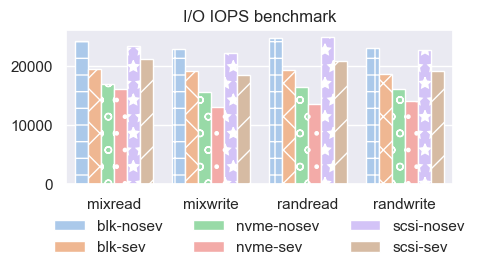

In [20]:
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.1f')
df=pd.read_csv("benchmarks/iops_results.csv")
df = df.sort_values(['group', 'name'],ascending = [True, True])
# print(df.to_latex(index=False))
sns.set(rc={'figure.figsize':(5,2)})
ax=sns.barplot(df, x="group",y="result",hue="name",orient="v", width=0.8,palette="pastel")
ax.set(xlabel ="", ylabel = "", title ='I/O IOPS benchmark')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.55),
    ncol=3,
    title=None, frameon=False,
)
for i, container in enumerate(ax.containers):
    for patch in container.patches:
        patch.set_hatch(hatches[i % len(hatches)])
plt.show()

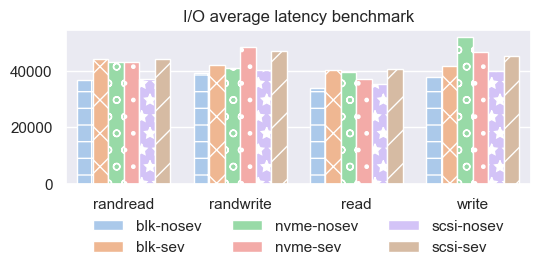

In [18]:
df=pd.read_csv("benchmarks/al_results.csv")
df = df.sort_values(['group', 'name'],ascending = [True, True])
# print(df.to_latex(index=False))
sns.set(rc={'figure.figsize':(6,2)})
ax=sns.barplot(df, x="group",y="result",hue="name",orient="v", width=0.8,palette="pastel")
ax.set(xlabel ="", ylabel = "", title ='I/O average latency benchmark')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.55),
    ncol=3,
    title=None, frameon=False,
)
for i, container in enumerate(ax.containers):
    for patch in container.patches:
        patch.set_hatch(hatches[i % len(hatches)])
plt.show()

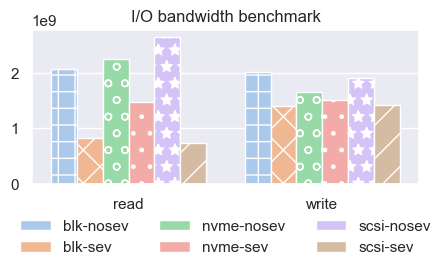

In [22]:
df=pd.read_csv("benchmarks/bw_results.csv")
df = df.sort_values(['group', 'name'],ascending = [True, True])
# print(df.to_latex(index=False))
sns.set(rc={'figure.figsize':(5,2)})
ax=sns.barplot(df, x="group",y="result",hue="name",orient="v", width=0.8, palette="pastel")
ax.set(xlabel ="", ylabel = "", title ='I/O bandwidth benchmark')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.55),
    ncol=3,
    title=None, frameon=False,
)
for i, container in enumerate(ax.containers):
    for patch in container.patches:
        patch.set_hatch(hatches[i % len(hatches)])
plt.show()